In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.4.0'

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [4]:
images = keras.datasets.cifar10.load_data()

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = images
print(f'X_train_full.shape: {X_train_full.shape}')
print(f'X_train_full.dtype: {X_train_full.dtype}')
print(f'y_train_full.shape: {y_train_full.shape}')
print(f'y_train_full.dtype: {y_train_full.dtype}')
print(f'X_test.shape: {X_test.shape}')
print(f'X_test.dtype: {X_test.dtype}')
print(f'y_test.shape: {y_test.shape}')
print(f'y_test.dtype: {y_test.dtype}')

X_train_full.shape: (50000, 32, 32, 3)
X_train_full.dtype: uint8
y_train_full.shape: (50000, 1)
y_train_full.dtype: uint8
X_test.shape: (10000, 32, 32, 3)
X_test.dtype: uint8
y_test.shape: (10000, 1)
y_test.dtype: uint8


In [6]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
X_valid, X_train = X_train_full[:10000] / 255.0, X_train_full[10000:] / 255.0

values = []
for data in y_train_full:
    values.append(data[0])

y_valid, y_train = np.asarray(y_train_full[:10000], dtype=np.float32), np.asarray(y_train_full[10000:], dtype=np.float32)
# print(f'y_valid.shape: {y_valid.shape}')
# print(f'y_valid.dtype: {y_valid.dtype}')
# print(f'y_train.shape: {y_train.shape}')
# print(f'y_train.dtype: {y_train.dtype}')

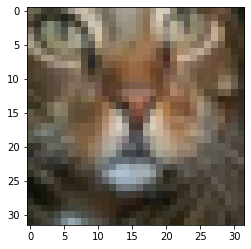

In [8]:
plt.imshow(X_train[5], cmap='gray')

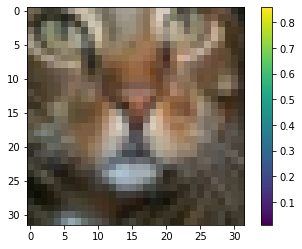

In [9]:
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
model = keras.models.Sequential()
model.add(keras.Input(shape=X_train[0].shape))
# model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
# model.add(keras.layers.Conv2D(32, (3, 3) , activation="relu", padding="same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))


model.summary()

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
optimizer="Adam",
metrics=['accuracy'])

print(f'X_train: {len(X_train)}')
print(f'y_train: {len(y_train)}')
print(f'X_valid: {len(X_valid)}')
print(f'y_valid: {len(y_valid)}')

In [19]:
history= model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8929 - accuracy: 0.2882
Epoch 2/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3158 - accuracy: 0.5256
Epoch 3/15
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1055 - accuracy: 0.6125
Epoch 4/15
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9687 - accuracy: 0.6587
Epoch 5/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.8828 - accuracy: 0.6915
Epoch 6/15
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8143 - accuracy: 0.7165
Epoch 7/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.7555 - accuracy: 0.7363
Epoch 8/15
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6957 - accuracy: 0.7546
Epoch 9/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.6547 - accuracy: 0.7689
Epoch 10/15
1250/1250 [==============================] - 11s 9ms/step -

In [20]:
model.evaluate(X_test / 255.0 , y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9019 - accuracy: 0.7346


[0.9019094705581665, 0.7346000075340271]

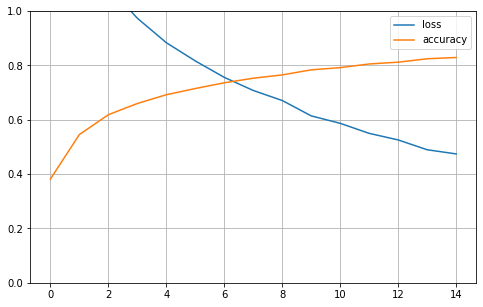

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

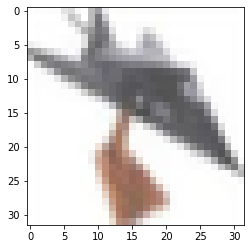

In [93]:
plt.imshow(X_test[215])

In [23]:
model = keras.models.Sequential()
model.add(keras.Input(shape=X_train[0].shape))
# model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
optimizer="Adam",
metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1250/1250 [==============================] - 30s 23ms/step - loss: 1.9971 - accuracy: 0.4030
Epoch 2/15
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0639 - accuracy: 0.6307
Epoch 3/15
1250/1250 [==============================] - 30s 24ms/step - loss: 0.8554 - accuracy: 0.7108
Epoch 4/15
1250/1250 [==============================] - 29s 24ms/step - loss: 0.7204 - accuracy: 0.7497
Epoch 5/15
1250/1250 [==============================] - 29s 23ms/step - loss: 0.6142 - accuracy: 0.7902
Epoch 6/15
1250/1250 [==============================] - 28s 23ms/step - loss: 0.5264 - accuracy: 0.8222
Epoch 7/15
1250/1250 [==============================] - 28s 23ms/step - loss: 0.4343 - accuracy: 0.8531
Epoch 8/15
1250/1250 [==============================] - 28s 23ms/step - loss: 0.3632 - accuracy: 0.8754
Epoch 9/15
1250/1250 [==============================] - 28s 23ms/step - loss: 0.3165 - accuracy: 0.8911
Epoch 10/15
1250/1250 [==============================] - 28s 23m

In [25]:
model.evaluate(X_test / 255.0 , y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.7703 - accuracy: 0.8081


[0.7702579498291016, 0.8080999851226807]

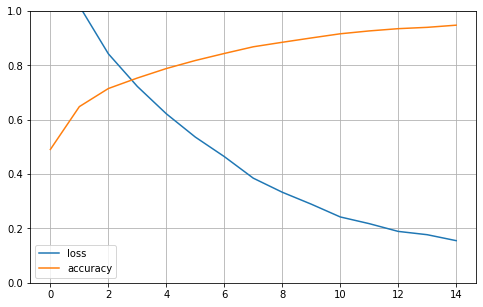

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

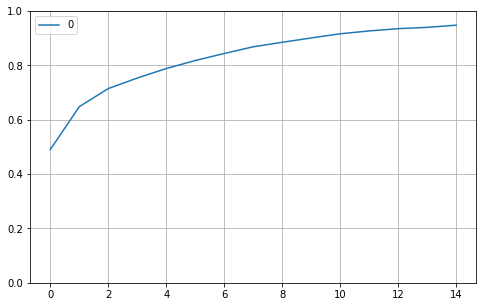

In [35]:
pd.DataFrame(history.history['accuracy']).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()